In [12]:
import numpy as np
import sympy as sp
from IPython.display import display
from sympy.abc import L, z, M, alpha, beta, n
sp.init_printing(forecolor='Black')

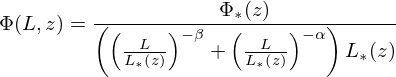

In [13]:
Phi_star, M_star, L_star, Phi = sp.symbols('Phi_*, M_*, L_*, Phi', cls=sp.Function)
QLF = sp.Eq(Phi(L, z), (Phi_star(z) / L_star(z)) * ((L / L_star(z))**-alpha + (L / L_star(z))**-beta)**-1)
QLF

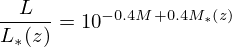

In [14]:
sp.Eq(L/L_star(z), 10**(0.4 * (M_star(z) - M)))

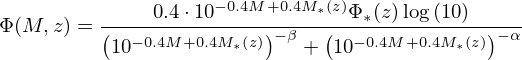

In [15]:
QLF_M = sp.Eq(Phi(M, z), Phi(L, z) * 0.4 * sp.log(10) * L)
QLF_M = QLF_M.subs({Phi(L, z): QLF.rhs}).subs({L/L_star(z): 10**(0.4 * (M_star(z) - M))})
QLF_M

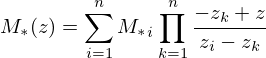

In [16]:
i, k = sp.symbols('i, k')
a = sp.IndexedBase('M_*')
z = sp.IndexedBase('z')
LumEvol = sp.Eq(M_star(z), sp.Sum(a[i] * sp.Product((z - z[k]) / (z[i] - z[k]), (k, 1, n)), (i, 1, n)))
LumEvol

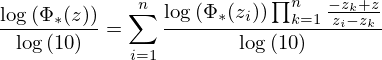

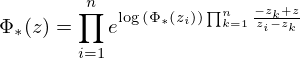

In [17]:
DenEvol = sp.Eq(sp.log(Phi_star(z), 10), sp.Sum(sp.log(Phi_star(z[i]), 10) * sp.Product((z - z[k]) / (z[i] - z[k]), (k, 1, n)), (i, 1, n)))
display(DenEvol)
sp.Eq(Phi_star(z), sp.solve(DenEvol, Phi_star(z))[0])

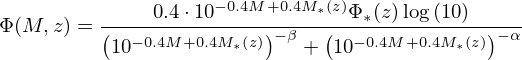

In [18]:
QLF_M.subs({M_star(z): LumEvol.rhs})

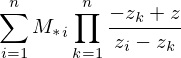

In [19]:
LumEvol.rhs.evalf(2)

In [20]:
from scipy.interpolate import lagrange
from numpy.polynomial import Polynomial
z_m_star = [0.5, 1., 2., 4.]
m_star = [-23.51, -24.64, -26.10, -27.08]

f = lagrange(z_m_star, m_star)
f.coef
f(0.75)

In [21]:
def LagrangePoly(x, order, j, xi=None):
    if xi is None:
        xi = sp.symbols(f'z:{order + 1:d}')

    idx = np.arange(order + 1)
    idx = np.delete(idx, j)
    return sp.prod([(x - xi[l]) / (xi[j] - xi[l]) for l in idx])

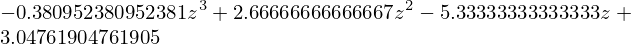

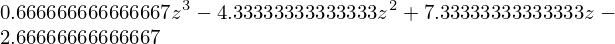

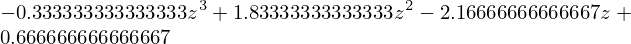

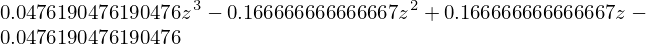

In [22]:
L = [LagrangePoly(sp.symbols('z'), order=3, j=i, xi=z_m_star) for i in range(len(z_m_star))]
for basis in L:
    display(basis.expand())

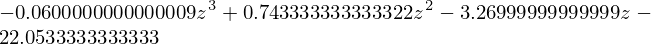

In [23]:
lp = sp.Add(*[m_star[m] * L[m] for m in range(len(L))])
display(lp.simplify())
lp_f = sp.lambdify(sp.symbols('z'), lp)

In [24]:
np.isclose(lp_f(0.75), f(0.75))

True

In [25]:
f.coef

array([ -0.06      ,   0.74333333,  -3.27      , -22.05333333])

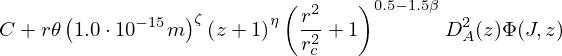

In [26]:
r, m, z, J = sp.symbols('r,m,z,J')
theta, eta, zeta, beta, rc, C = sp.symbols('theta, eta, zeta, beta, r_c, C')
N = sp.symbols('N', cls=sp.Function)(z, m, r, J)
DA = sp.symbols('D_A', cls=sp.Function)(z)
LF = sp.symbols('Phi', cls=sp.Function)(J, z)


model = theta * (1 + z)**eta * (m / 1e15)**zeta * (1 + (r / rc)**2)**(-1.5 * beta + 0.5) * DA**2 * r * LF + C
model

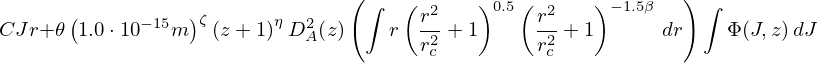

In [27]:
sp.Integral(model, r, J).simplify()

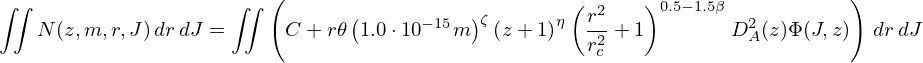

In [28]:
sp.Eq(sp.Integral(N, r, J), sp.Integral(model, r, J))

In [29]:
R, Jmin, Jmax = sp.symbols('R, J_min, J_max')
sp.integrate(model, (r, 0, R), (J, Jmin, Jmax))

                     ⎛    Jₘₐₓ                                   Jₘₐₓ         
                     ⎜     ⌠                                      ⌠           
              -1.5⋅β ⎜     ⎮                      1.5⋅β           ⎮           
    ⎛  2     ⎞       ⎜     ⎮            ⎛  2     ⎞                ⎮           
    ⎜ R      ⎟       ⎜     ⎮            ⎜ R      ⎟                ⎮           
1.0⋅⎜──── + 1⎟      ⋅⎜1.0⋅ ⎮   -1.0⋅C⋅R⋅⎜──── + 1⎟      dJ + 1.0⋅ ⎮   1.0⋅C⋅R⋅
    ⎜   2    ⎟       ⎜     ⎮            ⎜   2    ⎟                ⎮           
    ⎝r_c     ⎠       ⎜     ⎮            ⎝r_c     ⎠                ⎮           
                     ⎜     ⌡                                      ⌡           
                     ⎝    Jₘᵢₙ                                   Jₘᵢₙ         
──────────────────────────────────────────────────────────────────────────────
                                                                              

                           Jₘₐₓ                    

In [30]:
R, Jmin, Jmax = sp.symbols('R, J_min, J_max')
sp.Integral(C, (r, 0, R), (J, Jmin, Jmax)).doit()

In [31]:
# Set up the luminosity and density evolution using the fits from Assef+11 Table 2
z_i = [0.25, 0.5, 1., 2., 4.]
m_star_z_i = [-23.51, -24.64, -26.10, -27.08]
phi_star_z_i = [-3.41, -3.73, -4.17, -4.65, -5.77]
m_star = lagrange(z_i[1:], m_star_z_i)
log_phi_star = lagrange(z_i, phi_star_z_i)

In [32]:
sp.__version__

'1.11.1'

In [33]:
R, Jmin, Jmax = sp.symbols('R, J_min, J_max')
sp.Integral(C, (r, 0, R), (J, Jmin, Jmax)).doit()

In [34]:
# Set up the luminosity and density evolution using the fits from Assef+11 Table 2
z_i = [0.25, 0.5, 1., 2., 4.]
m_star_z_i = [-23.51, -24.64, -26.10, -27.08]
phi_star_z_i = [-3.41, -3.73, -4.17, -4.65, -5.77]
m_star = lagrange(z_i[1:], m_star_z_i)
log_phi_star = lagrange(z_i, phi_star_z_i)

In [35]:
sp.__version__

'1.11.1'

In [36]:
R, Jmin, Jmax = sp.symbols('R, J_min, J_max')
sp.Integral(C, (r, 0, R), (J, Jmin, Jmax)).doit()

In [37]:
# Set up the luminosity and density evolution using the fits from Assef+11 Table 2
z_i = [0.25, 0.5, 1., 2., 4.]
m_star_z_i = [-23.51, -24.64, -26.10, -27.08]
phi_star_z_i = [-3.41, -3.73, -4.17, -4.65, -5.77]
m_star = lagrange(z_i[1:], m_star_z_i)
log_phi_star = lagrange(z_i, phi_star_z_i)

In [38]:
sp.__version__

'1.11.1'